In [79]:
import matplotlib.pyplot as plt
import math

In [80]:
def czeb(k):
    return [math.cos((2*j -1)/(2*k) * math.pi) for j in range(1,k+1)]

In [81]:
def reg(k): # k rowno od 0 do 1
    return [x/(k - 1) for x in range(k)]

In [82]:
def scale(x,l,p): # z [o,1] a [l,p]
    return x * (p-l) + l

In [83]:
def fac(x):
    wyn=1
    for i in range(2,x+1):
        wyn *= i
    return wyn

def find(tab,x,i):
    index =0
    while tab[index][0]!= x:
        index += 1
    return tab[index][i+1]/fac(i)

def r(X,Y,l,p,pom,input):
    if pom[l][p]:
        return pom[l][p]
    if l == p:
        pom[l][p] = Y[l]
    elif X[p] == X[l]:
        pom[l][p] = find(input,X[l],p-l)
    else:
        pom[l][p] = (r(X,Y,l+1,p,pom,input) - r(X,Y,l,p-1,pom,input))/(X[p] - X[l])
    return pom[l][p]

def hermit(input,x_val):
    X = []
    Y = []
    for x in input:
        X += [x[0]] * (len(x) - 1)
        Y += [x[1]] * (len(x) - 1)
    pom = [[None for _ in X] for _ in X]
    
    result = [0 for _ in x_val]
    for index in range(len(x_val)):
        x = x_val[index]
        for i in range(len(X)):
            temp = r(X,Y,0,i,pom,input)
            for j in range(i):
                temp *= x - X[j]
            result[index] += temp
    return result

In [84]:
def f(x):
    k = 1
    m = 1
    return math.sin(m*x)*math.sin(k*x**2/math.pi)

def fp(x):
    return math.cos(x) * math.sin(x**2/math.pi) + (math.cos(x**2/math.pi)*(2*x/math.pi)) * math.sin(x)

In [85]:
def diff(Y_1,Y_2):
    diff=0
    for i in range(len(Y_1)):
        diff = max(diff,abs(Y_1[i]-Y_2[i]))
    return diff

def error(Y_1,Y_2):
    error = 0
    for i in range(len(Y_1)):
        error += (Y_1[i] - Y_2[i]) ** 2
    return error/len(Y_1)

In [93]:
points = 10
n = 1000

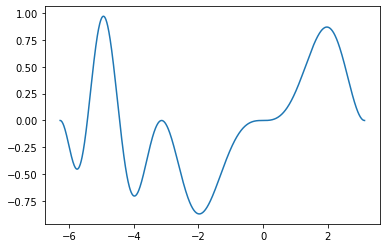

In [87]:
f_X = [scale(x,(-2) * math.pi,math.pi) for x in reg(n)]
f_Y = [f(x) for x in f_X]

plt.plot(f_X,f_Y)

Max difference: 
1.286613480409669
standard error: 
0.07233463718733886


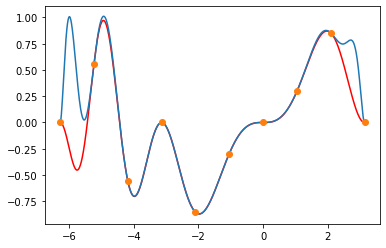

In [94]:
X = [scale(x,(-2) * math.pi,math.pi) for x in reg(points)]
Y = [f(x) for x in X]
joined = [[x, f(x), fp(x)] for x in X]
X_H = [scale(x,(-2) * math.pi,math.pi) for x in reg(n)]
Y_H = hermit(joined,X_H)

print("Max difference: ")
print(diff(f_Y,Y_H))
print("standard error: ")
print(error(f_Y,Y_H))

plt.plot(f_X,f_Y,'r-')
plt.plot(X_H,Y_H)
plt.plot(X,Y,'o')

Max difference: 
0.020558695164249352
standard error: 
9.328055532221927e-05


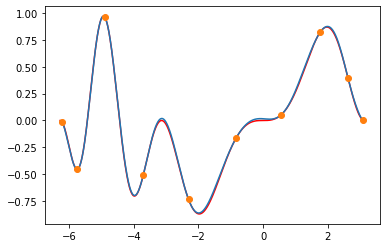

In [95]:
X = [scale((x+1)/2,(-2) * math.pi,math.pi) for x in czeb(points)]
Y = [f(x) for x in X]
joined = [[x, f(x), fp(x)] for x in X]
X_H = [scale(x,(-2) * math.pi,math.pi) for x in reg(n)]
Y_H = hermit(joined,X_H)

print("Max difference: ")
print(diff(f_Y,Y_H))
print("standard error: ")
print(error(f_Y,Y_H))

plt.plot(f_X,f_Y,'r-')
plt.plot(X_H,Y_H)
plt.plot(X,Y,'o')